The goal of this task is to build a linear regression model that predicts sleep quality using features like study hours, screen time, and caffeine intake.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor  # Import both regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [ ]:
path = "/content/drive/My Drive/student_sleep_patterns.csv"
df = pd.read_csv(path)
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Student_ID  Age Gender University_Year  Sleep_Duration  Study_Hours  \
0           1   24  Other        2nd Year             7.7          7.9   
1           2   21   Male        1st Year             6.3          6.0   
2           3   22   Male        4th Year             5.1          6.7   
3           4   24  Other        4th Year             6.3          8.6   
4           5   20   Male        4th Year             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  
0          3.4                2                 37             10  
1          1.9                5                 74              2  
2          3.9                5                 53              5  
3          2.8                4                 55              9  
4          2.7                0                 85              3  



Model Performance:
Linear Regression (Gradient Descent): MSE = 23.0347, R2 = -0.2665
Decision Tree: MSE = 24.2500, R2 = -0.3333
Random Forest: MSE = 22.1927, R2 = -0.2202

Best model saved: Random Forest


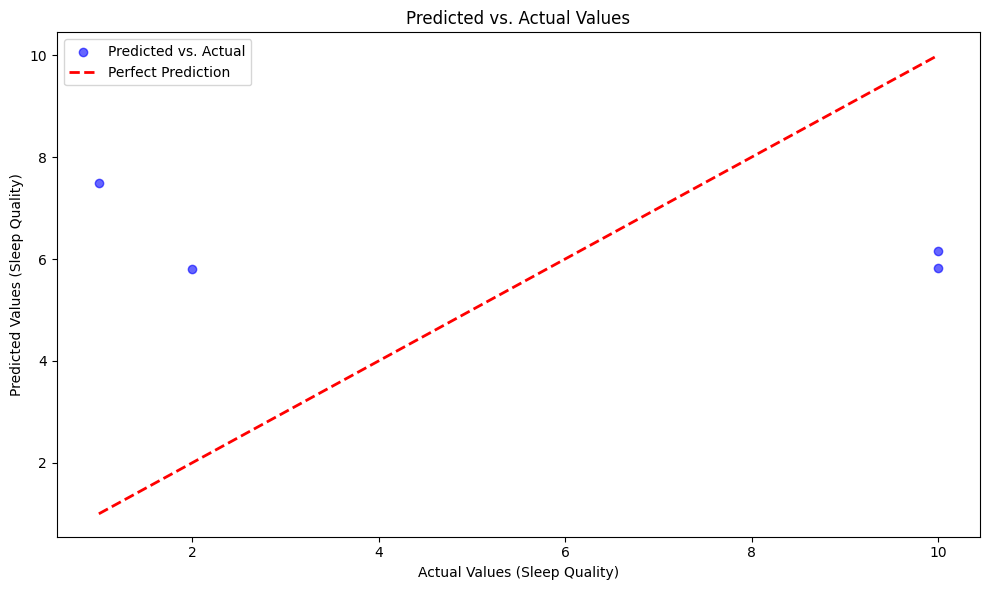


The Predicted vs. Actual graph has been saved as 'predicted_vs_actual.png'.


In [ ]:


# Feature selection
features = ['Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity']
X = df[features]
y = df['Sleep_Quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression (Gradient Descent)': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Print results
print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

# Save the best-performing model (e.g., Random Forest is assumed best here)
best_model_name = min(results, key=lambda x: results[x]['MSE'])  # Choose based on lowest MSE
best_model = models[best_model_name]
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print(f"\nBest model saved: {best_model_name}")

# Insert the code for the predicted vs. actual plot here
y_pred = best_model.predict(X_test_scaled)  # Predictions using the best model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values (Sleep Quality)')
plt.ylabel('Predicted Values (Sleep Quality)')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.tight_layout()

plt.savefig('predicted_vs_actual.png')  # Save the plot
plt.show()

print("\nThe Predicted vs. Actual graph has been saved as 'predicted_vs_actual.png'.")
